### Data Bootcamp: Intro to Matplotlib
This is my notebook as an intro to Matplotlib (and juypter notebooks). Be sure to read the chapter [**Python Graphics.**](https://nyudatabootcamp.gitbooks.io/data-bootcamp/content/graphs1.html) I'm going to organize this lecture around the question **How does GDP and it's expenditure componenets co-move?** There are several steps to answering this question:
- We will use `pandasdatareader` and bring in GDP data
- Then we will primarily work with the matplotlib approach of a figure and an axes approach.
- Work through different functionality as we do so. To limit the scope for now, lets ask a smaller question **How does Consumption and GDP co-move over time?** 

In [1]:
import pandas as pd    #Our pandas package
from pandas_datareader import data  # This is will give us access to FRED
import datetime as dt # This will get us the datatime package
import matplotlib.pyplot as plt

%matplotlib inline 
# This line tells jupyter to plot the graphs within the notebook

- The first line is our pandas package
- The second line is the data reader that will give us access to fred
- The third line is the datatime package
- The fourth line is new this is brining in the Matplotlip pyplot module
- The fith line then tells jupyter to plot stuff within everything.

In [2]:
start = dt.datetime(2000,1,1) 
codes = ["GDPC1", "PCECC96"] 

- This gives us our start date
- This will give us real gdp (quarterly) and then consumption (quarterly)

In [3]:
usdata = data.DataReader(codes, "fred", start)
usdata.columns = ["gdp", "cons"]
usdata["cons_share"] = usdata.cons / usdata.gdp
usdata.head()

,gdp,cons,cons_share
DATE,,,
2000-01-01,12359.1,8054.9,0.651738
2000-04-01,12592.5,8132.2,0.645797
2000-07-01,12607.7,8211.3,0.651292
2000-10-01,12679.3,8284.4,0.653380
2001-01-01,12643.3,8319.4,0.658009


I want to express and plot stuff as growth rates, so I'm going to create a new column with the data sereis in percent changes...note below, the percent change is doing quarter to quarter, to annualize the growth rate, multiply it by four...then times it by 100.

In [4]:
usdata[["gdp_growth", "cons_growth"]] = 100*4*usdata[["gdp","cons"]].pct_change()

In [5]:
usdata.gdp_growth.mean() # This should be about two percent...

1.8705563246355723

First, the book talks through other approaches to using matplotlib. The approach I will walk through is the third approach and is perfered. The basic idea is that the call above will create two types of objects, a fig object which is like the blank canvas for which a plot call will plot stuff on... The key object however will be the ax or axes part, what this will do is allow us direct axess to the properties of the firgure, title, legange, line colors, etc....

(-9, 9)

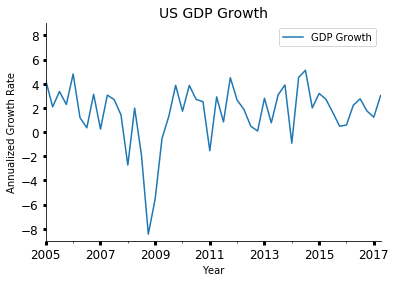

In [6]:
fig, ax = plt.subplots()

usdata.gdp_growth.plot(ax = ax) # So this ploted gdp growth using the axes generated above....
ax.set_title("US GDP Growth", fontsize = 14) # Set the legend...
ax.set_xlim(dt.datetime(2005,1,1)) # Set the time frame, note that the index is a date time, so to specify where to start 
                                   # I just used the dateime functionality....

ax.tick_params(labelcolor = "k", width = 3, labelsize = "12") # This will set the ticks and lables with them...
ax.legend(["GDP Growth"]) # Creates a legend and the ti
ax.set_ylabel("Annualized Growth Rate")
ax.set_xlabel("Year")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_ylim(-9,9)

Now that was cool, the key thing about this is it (i) gives us a lot of direct control and (ii) we won't have todo this over and over again (e.g. if you were trying to make multiple plots in excel. Now lets try to make two side by side plots of GDP growth and consumption

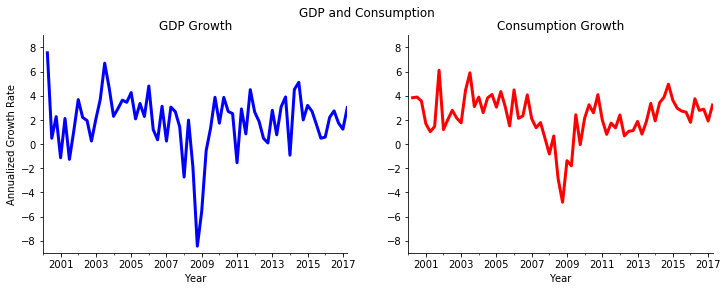

In [7]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size # now this optionality will change the figure size as displayed...

#plt.style.use("ggplot") # Then this is a style

fig, ax = plt.subplots(nrows = 1, ncols = 2, sharex = True) # So this will make two plots side by side, so one row, two columns
                                                            # Then the final command makes the x axis be the same
usdata.gdp_growth.plot(ax = ax[0], color = 'b', linewidth = 3.0) # Same idea, but specify that the first axes is for GDP
usdata.cons_growth.plot(ax=ax[1], color = 'r', linewidth = 3.0)

fig.suptitle("GDP and Consumption")

ax[0].set_title("GDP Growth") # This stuff sets the title for each of the subplots...
ax[1].set_title("Consumption Growth")

ax[0].set_ylim(-9,9) # I'm going to set the y limits so they are exactly the same...
ax[1].set_ylim(-9,9)

ax[0].spines["right"].set_visible(False) # Remove the box thing, I don't like it...
ax[1].spines["right"].set_visible(False)
ax[0].spines["top"].set_visible(False)
ax[1].spines["top"].set_visible(False)

ax[0].set_ylabel("Annualized Growth Rate") # Lable the y axis (only once since its the same for both)
ax[0].set_xlabel("Year") # Labor the x axis, looks good right...
ax[1].set_xlabel("Year")
